# https://cnvrg.io/keras-custom-loss-functions/
# How To Build Custom Loss Functions In Keras For Any Use Case

常用的loss function

![](./Commonly-Used-Loss-Functions-in-Machine-Learning-Algorithms-and-their-Keras-Implementation.webp)

In [1]:
import tensorflow as tf
import tensorflow.keras as keras

### 尝试使用最简单的线行模型 + 自己定义的Keras Symbolic Input + loss MSE， 喂入Keras中。

In [8]:
True_W = tf.constant(5.0)
True_B = tf.constant(3.0)
shape = (1000,)
X_train = tf.random.uniform(shape,minval=-10,maxval=10)
noise = tf.random.normal(shape) * 2
Y_train = X_train * True_W + True_B + noise

In [9]:
import matplotlib.pyplot as plt


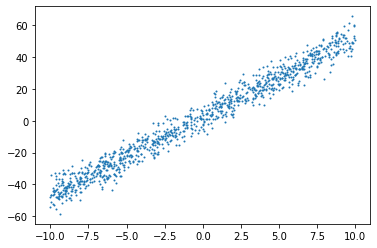

In [11]:
plt.scatter(X_train,Y_train,s=1)

In [69]:
inputs = keras.Input(shape=(1,))
outputs = keras.layers.Dense((1),activation=None,use_bias=True)(inputs)

In [70]:
m = keras.Model(inputs = inputs, outputs = outputs)
m.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [71]:
def myMSE(y_pred, y_true):
    return tf.reduce_mean((y_pred - y_true)**2)

In [72]:
myMSE(Y_train,Y_train)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

# first, use Keras built-in loss function to try

In [76]:
m.compile(loss=keras.losses.mse,optimizer='sgd')

In [77]:
X_train  = tf.reshape(X_train,(1000,1))
Y_train = tf.reshape(Y_train,(1000,1))

In [80]:
m.fit(X_train,Y_train,batch_size=1000,shuffle=True,validation_split=0.1,epochs=20)

Epoch 1/20
1/1 [==============================] - 0s 58ms/step - loss: 30.9430 - val_loss: 29.3911
Epoch 2/20
1/1 [==============================] - 0s 19ms/step - loss: 30.7590 - val_loss: 29.2344
Epoch 3/20
1/1 [==============================] - 0s 21ms/step - loss: 30.5823 - val_loss: 29.0843
Epoch 4/20
1/1 [==============================] - 0s 19ms/step - loss: 30.4126 - val_loss: 28.9406
Epoch 5/20
1/1 [==============================] - 0s 20ms/step - loss: 30.2495 - val_loss: 28.8030
Epoch 6/20
1/1 [==============================] - 0s 19ms/step - loss: 30.0929 - val_loss: 28.6713
Epoch 7/20
1/1 [==============================] - 0s 19ms/step - loss: 29.9424 - val_loss: 28.5451
Epoch 8/20
1/1 [==============================] - 0s 21ms/step - loss: 29.7978 - val_loss: 28.4243
Epoch 9/20
1/1 [==============================] - 0s 19ms/step - loss: 29.6589 - val_loss: 28.3087
Epoch 10/20
1/1 [==============================] - 0s 20ms/step - loss: 29.5255 - val_loss: 28.1980
Epoch 11/

In [81]:
Y_pred = m(X_train)

[<tf.Variable 'dense_6/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[4.990656]], dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(1,) dtype=float32, numpy=array([1.314097], dtype=float32)>]

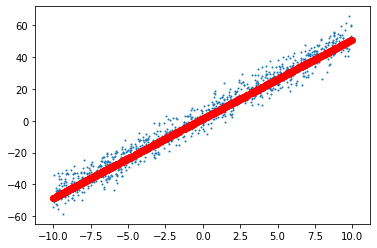

In [82]:
plt.scatter(X_train,Y_train,s=1)
plt.scatter(X_train,Y_pred,c='r')
m.variables

In [79]:
m.variables

[<tf.Variable 'dense_6/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[4.980845]], dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(1,) dtype=float32, numpy=array([0.5970116], dtype=float32)>]

In [83]:
myMSE(Y_train,Y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=28.258907>

In [85]:
tf.reduce_mean(keras.losses.mse(Y_train,Y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=28.258907>

# now use my own loss function

In [86]:
m.compile(loss=myMSE,optimizer='sgd')

In [87]:
m.fit(X_train,Y_train,batch_size=1000,shuffle=True,validation_split=0.1,epochs=20)

Epoch 1/20
1/1 [==============================] - 0s 81ms/step - loss: 28.3629 - val_loss: 27.2545
Epoch 2/20
1/1 [==============================] - 0s 17ms/step - loss: 28.2806 - val_loss: 27.1895
Epoch 3/20
1/1 [==============================] - 0s 19ms/step - loss: 28.2014 - val_loss: 27.1274
Epoch 4/20
1/1 [==============================] - 0s 21ms/step - loss: 28.1254 - val_loss: 27.0680
Epoch 5/20
1/1 [==============================] - 0s 18ms/step - loss: 28.0523 - val_loss: 27.0112
Epoch 6/20
1/1 [==============================] - 0s 20ms/step - loss: 27.9821 - val_loss: 26.9569
Epoch 7/20
1/1 [==============================] - 0s 19ms/step - loss: 27.9147 - val_loss: 26.9051
Epoch 8/20
1/1 [==============================] - 0s 21ms/step - loss: 27.8500 - val_loss: 26.8556
Epoch 9/20
1/1 [==============================] - 0s 19ms/step - loss: 27.7878 - val_loss: 26.8083
Epoch 10/20
1/1 [==============================] - 0s 24ms/step - loss: 27.7280 - val_loss: 26.7631
Epoch 11/

# try modify loss function with three input

In [97]:
def MyMSE_2 (y_pred,y_true, noise):
    return tf.reduce_mean((y_pred - y_true)**2) + tf.reduce_sum(noise)

In [98]:
noise = tf.random.normal((1000,0))

In [107]:
myLoss = MyMSE_2(outputs,Y_train,noise)
def wrapped_loss(x,y):
    return  MyMSE_2(x,y,noise)
m.compile(loss=wrapped_loss,optimizer='sgd')

In [108]:
m.fit(X_train,Y_train,batch_size=1000,shuffle=True,validation_split=0.1,epochs=20)

Epoch 1/20
1/1 [==============================] - 0s 91ms/step - loss: 27.2072 - val_loss: 26.3835
Epoch 2/20
1/1 [==============================] - 0s 20ms/step - loss: 27.1703 - val_loss: 26.3578
Epoch 3/20
1/1 [==============================] - 0s 20ms/step - loss: 27.1349 - val_loss: 26.3334
Epoch 4/20
1/1 [==============================] - 0s 23ms/step - loss: 27.1008 - val_loss: 26.3101
Epoch 5/20
1/1 [==============================] - 0s 19ms/step - loss: 27.0681 - val_loss: 26.2879
Epoch 6/20
1/1 [==============================] - 0s 21ms/step - loss: 27.0367 - val_loss: 26.2668
Epoch 7/20
1/1 [==============================] - 0s 19ms/step - loss: 27.0065 - val_loss: 26.2467
Epoch 8/20
1/1 [==============================] - 0s 20ms/step - loss: 26.9774 - val_loss: 26.2276
Epoch 9/20
1/1 [==============================] - 0s 20ms/step - loss: 26.9496 - val_loss: 26.2094
Epoch 10/20
1/1 [==============================] - 0s 19ms/step - loss: 26.9228 - val_loss: 26.1921
Epoch 11/

# Try reproduce Keras Symbolic Tensor Issue
# Conclusion: Due to the fact that loss comsume multi inputs, should use customised train_step. To do so, should define customsied Model. 

In [145]:
from keras.layers import Input
from tensorflow.keras import layers
from keras.layers import Input, Dense, Lambda, InputLayer, concatenate
from keras.models import Model, Sequential
from keras import backend as K
from keras import metrics

In [109]:
def vlb_binomial(x, x_decoded_mean, t_mean, t_log_var):
    return tf.reduce_sum(x + x_decoded_mean) + tf.reduce_sum(t_mean+t_log_var)

In [151]:
batch_size = 100
original_dim = 784 # Number of pixels in MNIST images.
latent_dim = 3 # d, dimensionality of the latent code t.
intermediate_dim = 256 # Size of the hidden layer.
epochs = 2

# both of the following setting can work
# inputs = Input(shape=(original_dim, ))
inputs = Input(batch_shape=(batch_size,original_dim))


dense = layers.Dense(8, activation="relu")
x = dense(inputs)
x = layers.Dense(8, activation=None)(x)
outputs = layers.Dense(original_dim)(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(100, 784)]              0         
_________________________________________________________________
dense_34 (Dense)             (100, 8)                  6280      
_________________________________________________________________
dense_35 (Dense)             (100, 8)                  72        
_________________________________________________________________
dense_36 (Dense)             (100, 784)                7056      
Total params: 13,408
Trainable params: 13,408
Non-trainable params: 0
_________________________________________________________________


In [154]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255
# vae.compile(optimizer=keras.optimizers.RMSprop(lr=0.001), loss=lambda x, y: loss)
# model.compile(optimizer=keras.optimizers.SGD(),loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True))
# history = model.fit(x_train, y_train, batch_size=100, epochs=2, validation_split=0.2)
model.compile(optimizer=keras.optimizers.SGD(),loss= keras.losses.mse)
history = model.fit(x_train, x_train, batch_size=100, epochs=2, validation_split=0.2)

Epoch 1/2
480/480 [==============================] - 1s 2ms/step - loss: 0.1133 - val_loss: 0.1107
Epoch 2/2
480/480 [==============================] - 1s 2ms/step - loss: 0.1111 - val_loss: 0.1092


In [158]:
# Try introduce encode part
original_dim =784
intermediate_dim  = 2
latent_dim = 2

# inputs = Input(shape=(original_dim, ))
inputs = Input(batch_shape=(batch_size,original_dim))

def create_encoder(input_dim):
    # Encoder network.
    # We instantiate these layers separately so as to reuse them later
    encoder = Sequential(name='encoder')
    encoder.add(InputLayer([input_dim]))
    encoder.add(Dense(intermediate_dim, activation='relu'))
    encoder.add(Dense(2 * latent_dim))
    return encoder
encoder = create_encoder(original_dim)
h = encoder(inputs)

In [159]:
get_t_mean = Lambda(lambda h: h[:, :latent_dim])
get_t_log_var = Lambda(lambda h: h[:, latent_dim:])
t_mean = get_t_mean(h)
t_log_var = get_t_log_var(h)

def sampling(args):
    t_mean, t_log_var = args
    # YOUR CODE HERE
    sample_std = tf.math.exp(t_log_var / 2.0)
    sample_shape = t_mean.shape
    sampled_normal = tf.random.normal(sample_shape)
    return t_mean + sample_std * sampled_normal


t = Lambda(sampling)([t_mean, t_log_var]) 

In [160]:
outputs = layers.Dense(original_dim, activation="relu")(t)

myModel = keras.Model(inputs=inputs, outputs=outputs, name="model_2")
myModel.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_28 (InputLayer)           [(100, 784)]         0                                            
__________________________________________________________________________________________________
encoder (Sequential)            (None, 4)            1582        input_28[0][0]                   
__________________________________________________________________________________________________
lambda_2 (Lambda)               (100, 2)             0           encoder[0][0]                    
__________________________________________________________________________________________________
lambda_3 (Lambda)               (100, 2)             0           encoder[0][0]                    
____________________________________________________________________________________________

In [161]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(optimizer=keras.optimizers.SGD(),loss= keras.losses.mse)
history = model.fit(x_train, x_train, batch_size=100, epochs=2, validation_split=0.2)

Epoch 1/2
480/480 [==============================] - 1s 2ms/step - loss: 0.1075 - val_loss: 0.1058
Epoch 2/2
480/480 [==============================] - 1s 2ms/step - loss: 0.1063 - val_loss: 0.1047


In [166]:
def vlb_binomial(x, x_decoded_mean, t_mean, t_log_var):
    log_x_decoded_mean_black = tf.math.log(x_decoded_mean + 0.000001)
    log_x_decoded_mean_white = tf.math.log(1 - x_decoded_mean + 0.000001)
    log_px_black = tf.reduce_sum((x) * log_x_decoded_mean_black)
    log_px_white = tf.reduce_sum((1-x)  * log_x_decoded_mean_white)
    log_px = log_px_black + log_px_white
    
    # for KL part
    t_var = tf.math.exp(t_log_var)
    KL = tf.reduce_sum(-0.5 * t_log_var + 0.5*(t_var + t_mean**2 -1))
    negative_VLB = (-log_px + KL) / x.shape[0]
    
    return negative_VLB

def MyLoss(t_mean,t_log_var):
    return lambda x,y:vlb_binomial(x, y, t_mean, t_log_var)

In [167]:
myModel = keras.Model(inputs=inputs, outputs=outputs, name="model_MyLoss")
myModel.compile(optimizer=keras.optimizers.SGD(),loss= MyLoss(t_mean,t_log_var))
myModel.summary()

Model: "model_MyLoss"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_28 (InputLayer)           [(100, 784)]         0                                            
__________________________________________________________________________________________________
encoder (Sequential)            (None, 4)            1582        input_28[0][0]                   
__________________________________________________________________________________________________
lambda_2 (Lambda)               (100, 2)             0           encoder[0][0]                    
__________________________________________________________________________________________________
lambda_3 (Lambda)               (100, 2)             0           encoder[0][0]                    
_______________________________________________________________________________________

In [168]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

history = myModel.fit(x_train, x_train, batch_size=100, epochs=2, validation_split=0.2)

Epoch 1/2


_SymbolicException: Inputs to eager execution function cannot be Keras symbolic tensors, but found [<tf.Tensor 'lambda_3/strided_slice:0' shape=(100, 2) dtype=float32>, <tf.Tensor 'lambda_2/strided_slice:0' shape=(100, 2) dtype=float32>]

# Reference: https://keras.io/examples/generative/vae/

## First, reproduce their example exactly

In [171]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [181]:
class Sampling(keras.layers.Layer):
    def call(self,input):
        z_mean,z_log_var = input
        batch_size= tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        random = tf.random.normal(shape=(batch_size, dim))
        return z_mean + random * tf.exp(0.5 * z_log_var)
    

In [205]:
# build encoder, Notice the the outputs has 3 parts. the z_mean and z_log_var will be used for loss calculation
latent_dim = 2 
encoder_inputs  = keras.Input(shape=(28,28,1))
x = layers.Conv2D(32,3,padding="same",strides=2,activation="relu")(encoder_inputs )
x = layers.Conv2D(16,3,padding="same",strides=2,activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(4)(x)
z_mean = layers.Dense(latent_dim,name="z_mean")(x) # Notice here the variable name is explicitly declared
z_log_var = layers.Dense(latent_dim,name="z_log_var")(x) # Notice here the variable name is explicitly declared
z = Sampling()([z_mean,z_log_var])
encoder = keras.Model(inputs=encoder_inputs , outputs=[z_mean,z_log_var,z],name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_51 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 14, 14, 32)   320         input_51[0][0]                   
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 7, 7, 16)     4624        conv2d_17[0][0]                  
__________________________________________________________________________________________________
flatten_11 (Flatten)            (None, 784)          0           conv2d_18[0][0]                  
____________________________________________________________________________________________

In [230]:
# build decoder 
latent_inputs  = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs )
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs,decoder_outputs,name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_53 (InputLayer)        [(None, 2)]               0         
_________________________________________________________________
dense_65 (Dense)             (None, 3136)              9408      
_________________________________________________________________
reshape_8 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_11 (Conv2DT (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_transpose_12 (Conv2DT (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_transpose_13 (Conv2DT (None, 28, 28, 1)         289       
Total params: 65,089
Trainable params: 65,089
Non-trainable params: 0
_______________________________________________________

In [236]:
# build the entire VAE model with train_step
class VAE(keras.Model):
    def __init__(self,encoder,decoder, **kwargs):
        super(VAE,self).__init__(**kwargs)
        print("hit")
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss = keras.metrics.Mean(name="total_loss")
        self.kl_loss = keras.metrics.Mean(name="kl_loss")
        self.reconstruction_loss = keras.metrics.Mean(name="reconstruction_loss")
    
    @property
    def metrics(self):
        return [self.total_loss,self.reconstruction_loss,self.kl_loss]

    def train_step(self,data):
        with tf.GradientTape() as tape:
            z_mean,z_log_var,z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = kl_loss + reconstruction_loss
        grad = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grad,self.trainable_weights))
        self.total_loss.update_state(total_loss)
        self.reconstruction_loss.update_state(reconstruction_loss)
        self.kl_loss.update_state(kl_loss)
        return {
            "loss": self.total_loss.result(),
            "reconstruction_loss": self.reconstruction_loss.result(),
            "kl_loss": self.kl_loss.result(),
        }
        

In [237]:
# Training
(x_train,_),(x_test,_) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

In [239]:
vae = VAE(encoder,decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=30, batch_size=128)

hit
Epoch 1/30
547/547 [==============================] - 54s 98ms/step - loss: 253.5758 - reconstruction_loss: 199.3809 - kl_loss: 2.9439
Epoch 2/30
547/547 [==============================] - 53s 96ms/step - loss: 170.5676 - reconstruction_loss: 163.3280 - kl_loss: 4.7312
Epoch 3/30
547/547 [==============================] - 53s 97ms/step - loss: 163.3363 - reconstruction_loss: 157.2886 - kl_loss: 5.1311
Epoch 4/30
547/547 [==============================] - 53s 97ms/step - loss: 160.6661 - reconstruction_loss: 154.7488 - kl_loss: 5.2871
Epoch 5/30
547/547 [==============================] - 54s 99ms/step - loss: 158.5654 - reconstruction_loss: 153.0576 - kl_loss: 5.4075
Epoch 6/30
547/547 [==============================] - 54s 99ms/step - loss: 157.8207 - reconstruction_loss: 152.0247 - kl_loss: 5.4953
Epoch 7/30
120/547 [=====>........................] - ETA: 43s - loss: 156.6789 - reconstruction_loss: 150.8634 - kl_loss: 5.5421

KeyboardInterrupt: 

Epoch 1/30


AttributeError: in user code:

    c:\program files\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    c:\program files\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\program files\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\program files\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\program files\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\program files\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    <ipython-input-231-1a7aaa0282ea>:34 train_step
        "loss": self.total_loss_tracker.result(),

    AttributeError: 'VAE' object has no attribute 'total_loss_tracker'


In [215]:
a = Pika(None,None)

## Second, modify their model to fit the Coursera need.